In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data_frame = pd.read_csv("D:\MY WORK SPACE\Project\Password Prediction\data.csv",error_bad_lines=False)
data_frame.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
#Checking if any null values in the dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [4]:
data_frame.isnull().sum()

password    1
strength    0
dtype: int64

In [5]:
data_frame.dropna(inplace=True)
data_frame.isnull().sum()

password    0
strength    0
dtype: int64

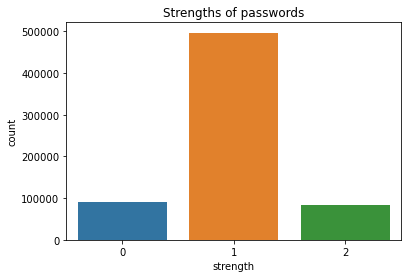

In [6]:
s= sns.countplot(data_frame['strength'])
plt.title('Strengths of passwords')
plt.show(s)

In [7]:
password_tuple = np.array(data_frame)
print(password_tuple)

[['kzde5577' 1]
 ['kino3434' 1]
 ['visi7k1yr' 1]
 ...
 ['184520socram' 1]
 ['marken22a' 1]
 ['fxx4pw4g' 1]]


In [8]:
import random
random.shuffle(password_tuple)

In [9]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]

In [10]:
def word_division(word):
    characters = list(word)
    return characters

In [11]:
#Using TF-IDF Vectorizer to convert a string into numerical data
vectorizer=TfidfVectorizer(tokenizer=word_division)

In [12]:
X=vectorizer.fit_transform(x)
X.shape

(669639, 135)

In [13]:
first_document_vector = X[0]

In [14]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591836
5,0.566934
z,0.336110
k,0.291717
d,0.285060
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=5)

In [16]:
X_train.shape

(468747, 135)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0,multi_class='multinomial')

In [18]:
classifier.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [19]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

## Training & testing accuracy

In [20]:
#Checking the accuracy of the model
from sklearn.metrics import confusion_matrix,accuracy_score

In [21]:
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
print("The training accuracy is: ",accuracy_train)
print("The testing accuracy is: ",accuracy_test)

The training accuracy is:  0.8195679119013028
The testing accuracy is:  0.8199928319694164


## Building a classification report

In [22]:
#Classification report for testing data
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39     26994
           1       0.84      0.94      0.89    149029
           2       0.82      0.69      0.75     24869

    accuracy                           0.82    200892
   macro avg       0.75      0.64      0.67    200892
weighted avg       0.80      0.82      0.80    200892



## Predicting the strength of the password

In [23]:
def make_prediction(password):
    dt=np.array(password)
    pred=vectorizer.transform(dt)
    prediction = classifier.predict(pred)
    if prediction[0] == 0:
        print("Your password is weak")
    elif prediction[0] == 1:
        print("Your password is medium")
    else:
        print("Your password is strong")

In [24]:
password = input("Enter your password: ")
p= list()
p.append(password)
make_prediction(p)

Enter your password: Surya
Your password is weak
